In [3]:
import os
from utils import load_caption, decode_caption, load_vocab
import pickle
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

%matplotlib inline
plt.style.use('ggplot')

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
vocab = load_vocab('/home/spb61/coco2014_vocab.json')

idx_to_word
word_to_idx
Loaded dictionary...
Dictionary size: 5004


In [5]:
def load_beam_lengths(k):
    image_dir = "/datadrive/val_beam_{}_states/".format(k)
    lengths = []
    for image in tqdm(os.listdir(image_dir)):
        cap = load_caption(image, image_dir=image_dir)
        lengths.append(len(decode_caption(cap['captions'][0]['sentence'], vocab)))
    print("Images found: {}".format(len(lengths)))
    return lengths

In [6]:
# beam_lengths = {}
# for k in [1,2,10,100]:
#     lengths = load_beam_lengths(k)
#     beam_lengths[k] = lengths

# pickle.dump(beam_lengths, open('beam_lengths.pickle', 'wb'))

beam_lengths = pickle.load(open('beam_lengths.pickle', 'rb'))


In [7]:
# print(beam_lengths.keys())
for k in sorted(beam_lengths.keys()):
    l = np.array(beam_lengths[k])
#     print(np.mean(l))
    zeroes = np.where(l == 0)[0]
    print(k, zeroes)
    print(len(zeroes))
average_beam_lengths = [np.mean(np.array(beam_lengths[k])) for k in [1,2,10,100]]

1 []
0
2 []
0
10 []
0
100 [   76    83   247   473   581   587   808   918   926  1247  2091  2669
  3276  3383  3960  5172  5411  5548  6414  6705  7043  7312  7487  7805
  8308  8842  9050  9340  9811 10594 10801 11841 12673 12754 13124 13494
 13623 13624 14295 14600 15180 15752 15923 16334 16405 16672 16921 17278
 17692 17871 18109 18719 19714 19744 20750 20823 21154 21425 21785 21853
 21867 22032 22311 22744 23063 23535 23662 24053 24470 24477 24671 24729
 25224 25961 25981 26129 26230 26372 26385 26387 26618 26663 26974 27659
 27845 29052 29597 29598 29938 29990 30147 30917 31266 31409 31928 32017
 32078 32276 32441 32584 32859 32995 33722 33890 34224 35121 35303 36085
 36365 36620 37677 37801 38238 38349 38505 38947 38970 39007 39071 39225
 39455 40054 40092]
123
[8.406478372506418, 8.788169069721508, 9.183562117321745, 9.109717558759629]


In [8]:
def average_length(voted_pickle_file):
    with open(voted_pickle_file, 'rb') as handle:
        voted_captions = pickle.load(handle)
    lengths = []
    for caption in voted_captions.values():
        best_caption = decode_caption(caption[0][0], vocab)
        lengths.append(len(best_caption))
    print("Average length: {}\t std: {}".format(np.mean(lengths), np.std(lengths)))
    return np.mean(lengths), np.std(lengths)

In [15]:
print(average_beam_lengths)

[8.406478372506418, 8.788169069721508, 9.183562117321745, 9.109717558759629]


In [9]:
hidden_lengths = []
for k in [1,2,10,100]:
    mean_length, std = average_length('../outputs/vote_captions_{}_hidden.pickle'.format(k))
    hidden_lengths.append(mean_length)

Average length: 8.406478372506418	 std: 2.191467910709649
Average length: 9.090460201461584	 std: 1.7584939166161317
Average length: 9.323671736124828	 std: 1.4712387101932882
Average length: 8.807549871617619	 std: 2.7969628997897344


In [10]:
unigram_overlap_lengths = []
for k in [1,2,10,100]:
    mean_length, std = average_length('../outputs/vote_captions_{}_unigram_overlap.pickle'.format(k))
    unigram_overlap_lengths.append(mean_length)

Average length: 8.406478372506418	 std: 2.191467910709649
Average length: 9.215929290934229	 std: 1.6575341848378318
Average length: 10.397096583053525	 std: 1.346635907652899
Average length: 11.194425241951413	 std: 1.4140381122258314


In [11]:
unigram_precision_lengths = []
for k in [1,2,10,100]:
    mean_length, std = average_length('../outputs/vote_captions_{}_unigram_precision.pickle'.format(k))
    unigram_precision_lengths.append(mean_length)

Average length: 8.406478372506418	 std: 2.191467910709649
Average length: 9.20684376851669	 std: 1.6583649705514831
Average length: 10.37586411218645	 std: 1.3573437679477391
Average length: 11.149269207979458	 std: 1.4356593864846516


In [12]:
bigram_precision_lengths = []
for k in [1,2,10,100]:
    mean_length, std = average_length('../outputs/vote_captions_{}_bigram_precision.pickle'.format(k))
    bigram_precision_lengths.append(mean_length)

Average length: 8.406478372506418	 std: 2.191467910709649
Average length: 8.961682796760813	 std: 1.6488653537759825
Average length: 9.860087892553821	 std: 1.3596543083504866
Average length: 10.54589670156034	 std: 1.4964461656203425


In [13]:
bigram_overlap_lengths = []
for k in [1,2,10,100]:
    mean_length, std = average_length('../outputs/vote_captions_{}_bigram_overlap.pickle'.format(k))
    bigram_overlap_lengths.append(mean_length)

Average length: 8.406478372506418	 std: 2.191467910709649
Average length: 8.961855619198104	 std: 1.6497001664657547
Average length: 9.862408650997432	 std: 1.3585106333498342
Average length: 10.54631641319376	 std: 1.4947659555666257


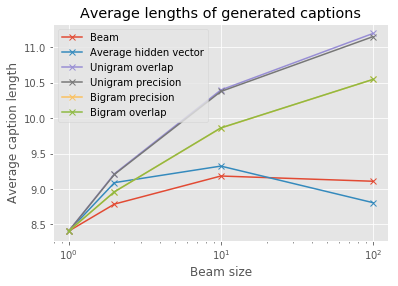

In [14]:
# TODO: WHY IS THE OUTPUT LENGTH WHEN k=1 not equal everywhere...

X = [1,2,10,100]
plt.plot(X, average_beam_lengths, 'x-', label='Beam')
plt.plot(X, hidden_lengths, 'x-', label='Average hidden vector')
plt.plot(X, unigram_overlap_lengths, 'x-', label='Unigram overlap')
plt.plot(X, unigram_precision_lengths, 'x-', label='Unigram precision')
plt.plot(X, bigram_precision_lengths, 'x-', label='Bigram precision')
plt.plot(X, bigram_overlap_lengths, 'x-', label='Bigram overlap')
plt.xscale('log')
plt.title("Average lengths of generated captions")
plt.xlabel("Beam size")
plt.ylabel("Average caption length")
plt.legend()
plt.savefig('../outputs/figs/average_lengths.png', bbox_inches='tight')

In [14]:
ls ../outputs/

figs/
model1.0.ckpt.data-00000-of-00001
model1.0.ckpt.index
model1.0.ckpt.meta
vote_captions_100_bigram_overlap.pickle
vote_captions_100_bigram_precision.pickle
vote_captions_100_hidden.pickle
vote_captions_100_unigram_overlap.pickle
vote_captions_100_unigram_precision.pickle
vote_captions_10_bigram_overlap.pickle
vote_captions_10_bigram_precision.pickle
vote_captions_10_hidden.pickle
vote_captions_10_unigram_overlap.pickle
vote_captions_10_unigram_precision.pickle
vote_captions_1_bigram_overlap.pickle
vote_captions_1_bigram_precision.pickle
vote_captions_1_hidden.pickle
vote_captions_1_unigram_overlap.pickle
vote_captions_1_unigram_precision.pickle
vote_captions_2_bigram_overlap.pickle
vote_captions_2_bigram_precision.pickle
vote_captions_2_hidden.pickle
vote_captions_2_unigram_overlap.pickle
vote_captions_2_unigram_precision.pickle
vote_captions.pickle


# T-test between caption lengths

In [16]:
voted_captions = pickle.load(open('../outputs/vote_captions_100_bigram_precision.pickle', 'rb'))
vote_lengths = []

for caption in voted_captions.values():
    best_caption = decode_caption(caption[0][0], vocab)
    vote_lengths.append(len(best_caption))
print("Average length: {}\t std: {}".format(np.mean(vote_lengths), np.std(vote_lengths)))

Average length: 10.54589670156034	 std: 1.4964461656203425


In [22]:
from scipy.stats import ttest_ind

test_res = ttest_ind(vote_lengths, load_beam_lengths(100) )

 48%|████▊     | 19494/40504 [29:53<32:12, 10.87it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 40504/40504 [1:09:22<00:00,  9.73it/s]

Images found: 40504


In [27]:
test_res

Ttest_indResult(statistic=150.3519243779059, pvalue=0.0)